## Sampling Theory

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
import numpy as np
import pandas as pd

In [3]:
population = np.random.randint(0, 80, 10000)

In [4]:
population[:10]

array([69, 76, 44, 21, 25,  7, 72, 30, 44, 25])

In [5]:
#sampling
np.random.seed(115)
sample = np.random.choice(a = population, size = 100)
sample[:10]

array([31, 61, 22, 72, 31, 51, 16, 59, 27, 58])

In [6]:
sample.mean()

40.08

In [7]:
population.mean()

39.448

In [8]:
# sampling distribution
sample1 = np.random.choice(a = population, size = 100)
sample2 = np.random.choice(a = population, size = 100)
sample3 = np.random.choice(a = population, size = 100)
sample4 = np.random.choice(a = population, size = 100)
sample5 = np.random.choice(a = population, size = 100)
sample6 = np.random.choice(a = population, size = 100)
sample7 = np.random.choice(a = population, size = 100)
sample8 = np.random.choice(a = population, size = 100)
sample9 = np.random.choice(a = population, size = 100)
sample10 = np.random.choice(a = population, size = 100)

In [9]:
(sample1.mean() + sample2.mean() + sample3.mean() + sample4.mean() + sample5.mean() + sample6.mean() 
 + sample7.mean() + sample8.mean() + sample9.mean() + sample10.mean()) / 10

39.468

## Descriptive Statistics

In [10]:
import seaborn as sns
tips = sns.load_dataset("tips", cache = False)
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [12]:
!pip install researchpy
import researchpy as rp

In [13]:
tip_summary = rp.summary_cont(df["tip"])
total_bill_summary = rp.summary_cont(df["total_bill"])
size_summary = rp.summary_cont(df["size"])

# Concatenate the summaries
merged_summary = pd.concat([tip_summary, total_bill_summary, size_summary],ignore_index = True, axis=0)

# Display the merged summary statistics
merged_summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
1,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [14]:
df[["tip", "total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [15]:
df[["tip", "total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


## Business Application: Price Strategy Decision Support System (DSS)

In [16]:
prices = np.random.randint(10, 110, 1000)

In [17]:
prices.mean()

60.601

In [18]:
import statsmodels.stats.api as sms

In [19]:
sms.DescrStatsW(prices).tconfint_mean()

(58.81456797930814, 62.38743202069186)

# Probability Distributions

## Bernoulli Distribution

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$


${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [20]:
from scipy.stats import bernoulli

In [21]:
p = 0.6

In [22]:
rv = bernoulli(p)
rv.pmf(k = 1)

0.6

In [23]:
rv.pmf(k = 0)

0.4000000000000001

## Law of large numbers

In [24]:
rng = np.random.RandomState(123)
for i in np.arange(1, 20):
    experiment_count = 2**i
    coin_tosses = rng.randint(0, 2, size=experiment_count)
    probability_of_tails = np.mean(coin_tosses)
    print("Number of Tosses:", experiment_count, "---", 'Probability of Tails: %.2f' % (probability_of_tails * 100))


Number of Tosses: 2 --- Probability of Tails: 50.00
Number of Tosses: 4 --- Probability of Tails: 0.00
Number of Tosses: 8 --- Probability of Tails: 62.50
Number of Tosses: 16 --- Probability of Tails: 43.75
Number of Tosses: 32 --- Probability of Tails: 46.88
Number of Tosses: 64 --- Probability of Tails: 56.25
Number of Tosses: 128 --- Probability of Tails: 50.78
Number of Tosses: 256 --- Probability of Tails: 52.73
Number of Tosses: 512 --- Probability of Tails: 52.93
Number of Tosses: 1024 --- Probability of Tails: 50.20
Number of Tosses: 2048 --- Probability of Tails: 48.58
Number of Tosses: 4096 --- Probability of Tails: 49.49
Number of Tosses: 8192 --- Probability of Tails: 49.58
Number of Tosses: 16384 --- Probability of Tails: 49.96
Number of Tosses: 32768 --- Probability of Tails: 50.00
Number of Tosses: 65536 --- Probability of Tails: 49.68
Number of Tosses: 131072 --- Probability of Tails: 49.97
Number of Tosses: 262144 --- Probability of Tails: 50.13
Number of Tosses: 5242

## Binomial Distribution
${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

In [25]:
from scipy.stats import binom

In [26]:
p = 0.01
n = 100
rv = binom(n, p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


## Poisson Distribution
${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

In [27]:
from scipy.stats import poisson

In [28]:
lambda_ = 0.1

In [30]:
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0))
print(rv.pmf(k = 3))
print(rv.pmf(k = 5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


## Normal Distribution

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  mean or expected value

* ${\displaystyle \sigma }$  standart deviation

* ${\displaystyle \sigma ^{2}}$ variance

In [32]:
from scipy.stats import norm

In [33]:
# greater than 90
1-norm.cdf(90, 80, 5) # (value to calculate, 𝜇, 𝜎)

0.02275013194817921

In [34]:
# greater than 70
1-norm.cdf(70, 80, 5)

0.9772498680518208

In [36]:
# less than 73
norm.cdf(73, 80, 5)

0.08075665923377107

In [37]:
# between 85 and 90
norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5)

0.13590512198327787

# One Sample T Test

Used to determine whether an unknown population mean is different from a specific value.  

**Hypotheses:**

<d><i>H</i><sub>0</sub>: $\mu = \mu_0$   
<d><i>H</i><sub>1</sub>: $\mu ≠ \mu_0$</d><br><br>

<d><i>H</i><sub>0</sub>: $\mu <= \mu_0$</d><br>
<d><i>H</i><sub>1</sub>: $\mu > \mu_0$</d><br><br>

<d><i>H</i><sub>0</sub>: $\mu >=\mu_0$</d><br>
<d><i>H</i><sub>1</sub>: $\mu < \mu_0$</d><br><br>




<table></table>

**Test Statistic:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


In [38]:
import numpy as np

values = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [39]:
values[:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [8]:
import scipy.stats as stats

In [42]:
stats.describe(values)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

## Assumption of Normality

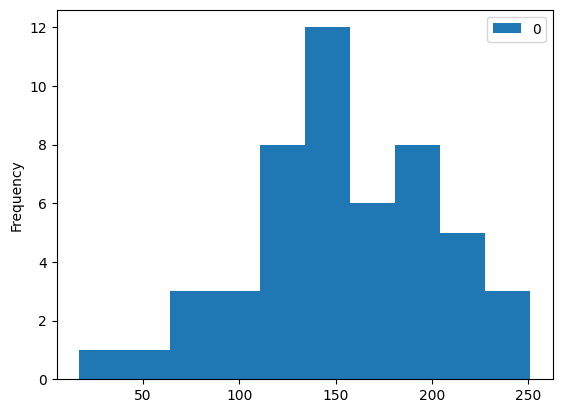

In [44]:
#histogram
pd.DataFrame(values).plot.hist();

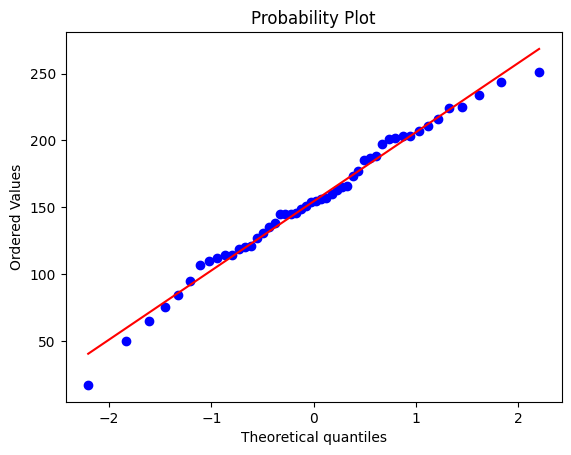

In [46]:
#qqplot
import pylab 
stats.probplot(values, dist="norm", plot = pylab)
pylab.show();

### Shapiro-Wilks Testi

<d><i>H</i><sub>0</sub>: The population is normally distributed  
<d><i>H</i><sub>1</sub>: The population is not normally distributed

In [47]:
from scipy.stats import shapiro

In [50]:
shapiro(values)

ShapiroResult(statistic=0.9853101372718811, pvalue=0.7848551869392395)

##### Hypothesis Test 

<d><i>H</i><sub>0</sub>: Average time spent on the website is equal to 170  
<d><i>H</i><sub>1</sub>: Average time spent on the website is not equal to 170

In [51]:
stats.ttest_1samp(values, popmean=170)

TtestResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446, df=49)

## Nonparametric One Sample T Test

In [52]:
from statsmodels.stats.descriptivestats import sign_test

In [54]:
sign_test(values, 170)

(-7.0, 0.06490864707227217)

##  One Sample Proportion Test

<i>H</i><sub>0</sub>: P = 0.125  
<i>H</i><sub>1</sub>: P ≠ 0.125

In [58]:
from statsmodels.stats.proportion import proportions_ztest

In [59]:
count = 40
nobs = 500
value = 0.125

In [60]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

## A/B Test

<d><i>H</i><sub>0</sub>: $\mu_1 = \mu_2$   
<d><i>H</i><sub>1</sub>: $\mu_1 ≠ \mu_2$</d><br><br>
<d><i>H</i><sub>0</sub>: $\mu_1 <= \mu_2$</d><br>
<d><i>H</i><sub>1</sub>: $\mu_1 > \mu_2$</d><br><br>
<d><i>H</i><sub>0</sub>: $\mu_1 >=\mu_2$</d><br>
<d><i>H</i><sub>1</sub>: $\mu_1 < \mu_2$</d><br><br>

#### Data Type I

In [61]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


#### Data Type II

In [67]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A and Group A
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"
A = pd.concat([A, GROUP_A], axis = 1)

#B and Group B
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"
B = pd.concat([B, GROUP_B], axis = 1)

#All data
AB = pd.concat([A,B])
AB.columns = ["income","GROUP"]
print(AB.head())
print(AB.tail())

   income GROUP
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    income GROUP
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


In [64]:
import seaborn as sns

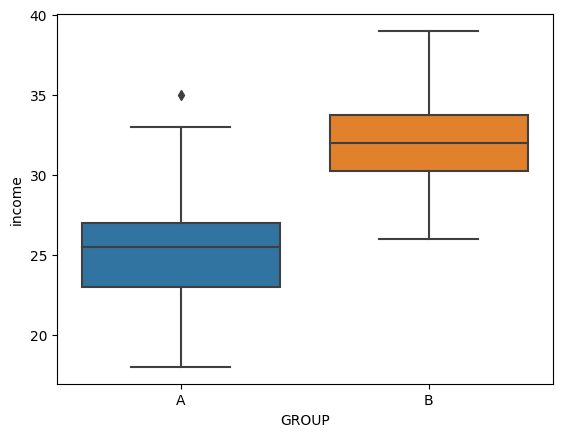

In [68]:
sns.boxplot(x = "GROUP", y = "income", data = AB);

#### Assumption Verification

In [72]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [73]:
AB.head()

,income,GROUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [75]:
#normality assumption
from scipy.stats import shapiro

In [78]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)

In [79]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)

In [80]:
#homogeneity of variances

<d><i>H</i><sub>0</sub>: Variances are homogenous  
<d><i>H</i><sub>1</sub>: Variances are not homogenous

In [81]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

#### Hypothesis Testing

In [82]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True) # H0:𝜇1=𝜇2 is rejected

TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)

### Nonparametric Independent Two Sample Test

In [83]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

## Dependent Two Sample Test

In [84]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [85]:
before[:5]

,0
0,123
1,119
2,119
3,116
4,123


In [86]:
after[:5]

,0
0,118
1,127
2,122
3,132
4,129


In [91]:
#Dataset 1
SEPARATE = pd.concat([before, after], axis = 1)
SEPARATE.columns = ["BEFORE","AFTER"]
print("'SEPARATE' Dataset: \n\n ", SEPARATE.head(), "\n\n")


#Dataset 2
#Before FLAG/TAG
GROUP_BEFORE = np.arange(len(before))
GROUP_BEFORE = pd.DataFrame(GROUP_BEFORE)
GROUP_BEFORE[:] = "BEFORE"

#FLAG and Before Concat
A = pd.concat([before, GROUP_BEFORE], axis = 1)

#After FLAG/TAG
GROUP_AFTER = np.arange(len(after))
GROUP_AFTER = pd.DataFrame(GROUP_AFTER)
GROUP_AFTER[:] = "AFTER"

#FLAG and After Concat
B = pd.concat([after, GROUP_AFTER], axis = 1)

#Gather All Data
ALL = pd.concat([A,B])
ALL

#Naming
ALL.columns = ["PERFORMANCE","BEFORE_AFTER"]
print("'ALL' Dataset: \n\n", ALL.head(), "\n")

'SEPARATE' Dataset: 

     BEFORE  AFTER
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 


'ALL' Dataset: 

    PERFORMANCE BEFORE_AFTER
0          123       BEFORE
1          119       BEFORE
2          119       BEFORE
3          116       BEFORE
4          123       BEFORE 



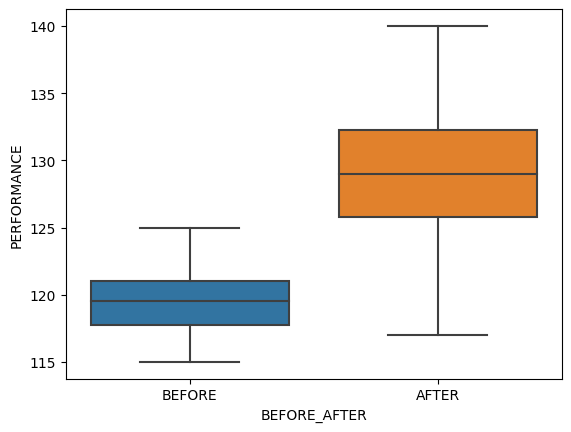

In [93]:
sns.boxplot(x = "BEFORE_AFTER", y = "PERFORMANCE", data = ALL);

#### Assumption Verification

In [94]:
shapiro(SEPARATE.BEFORE)

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722016543149948)

In [95]:
shapiro(SEPARATE.AFTER)

ShapiroResult(statistic=0.9780092239379883, pvalue=0.6159630417823792)

In [96]:
stats.levene(SEPARATE.BEFORE, SEPARATE.AFTER) # ignored the result

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

### Hypothesis Testing

In [99]:
stats.ttest_rel(SEPARATE.BEFORE, SEPARATE.AFTER)

TtestResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11, df=39)

## Nonparametric Dependent Two Sample Test

In [98]:
stats.wilcoxon(SEPARATE.BEFORE, SEPARATE.AFTER)

C:\Users\yasli\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

## Two Sample Proportion Test
H0: $p_1 = p_2$  
H1: $p_1 ≠ p_2$  

In [100]:
from statsmodels.stats.proportion import proportions_ztest

In [101]:
num_of_success = np.array([300, 250])
num_of_observations = np.array([1000, 1100])

In [102]:
proportions_ztest(count = num_of_success, nobs = num_of_observations) 

(3.7857863233209255, 0.0001532232957772221)

## Variance Analysis
H0: $𝜇_1 = 𝜇_2 = 𝜇_3$

In [3]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GROUP_A","GROUP_B","GROUP_C"]
ABC.head()

,GROUP_A,GROUP_B,GROUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


#### Assumption Checking

In [4]:
from scipy.stats import shapiro

In [5]:
shapiro(ABC.GROUP_A)

ShapiroResult(statistic=0.969743013381958, pvalue=0.5321670174598694)

In [6]:
shapiro(ABC.GROUP_B)

ShapiroResult(statistic=0.9789853096008301, pvalue=0.7979751229286194)

In [7]:
shapiro(ABC.GROUP_C)

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [9]:
stats.levene(ABC.GROUP_A, ABC.GROUP_B, ABC.GROUP_C)

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

#### Hypothesis Testing

In [10]:
from scipy.stats import f_oneway

In [11]:
f_oneway(ABC.GROUP_A, ABC.GROUP_B, ABC.GROUP_C)

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [15]:
print('{:.5f}'.format(f_oneway(ABC["GROUP_A"], ABC["GROUP_B"],ABC["GROUP_C"])[1]))

0.00000


In [16]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GROUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GROUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GROUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


#### Nonparametric Hypothesis Testing

In [17]:
from scipy.stats import kruskal

In [18]:
kruskal(ABC.GROUP_A, ABC.GROUP_B, ABC.GROUP_C)

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

## Correlation Analysis

In [19]:
import seaborn as sns
tips = sns.load_dataset("tips", cache = False)
df = tips.copy()
df.head()
# total_bill => (tip and tax included)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
df["total_bill"] = df.total_bill - df.tip
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


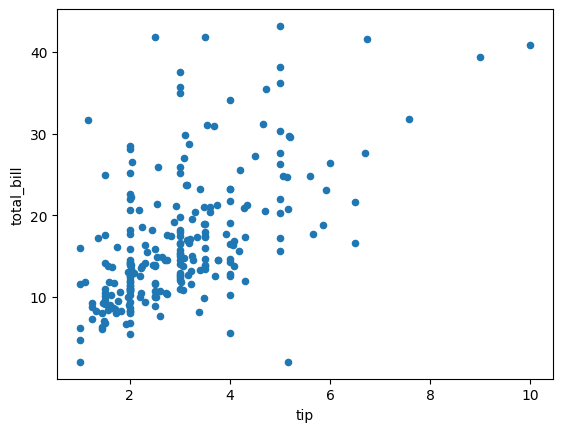

In [25]:
df.plot.scatter("tip", "total_bill");

#### Assumption Checking

In [26]:
shapiro(df.tip)

ShapiroResult(statistic=0.8978114128112793, pvalue=8.200817629144819e-12)

In [27]:
shapiro(df.total_bill)

ShapiroResult(statistic=0.9135653972625732, pvalue=1.1060685700670092e-10)

### Hypothesis Testing
#### Correlation Coefficient

In [29]:
df["tip"].corr(df["total_bill"]) #pearson

0.5766634471096378

In [30]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

#### Significance Level

In [32]:
from scipy.stats import pearsonr

In [33]:
pearsonr(df.tip, df.total_bill)

PearsonRResult(statistic=0.5766634471096381, pvalue=5.018290084948537e-23)

#### Nonparametric Hypothesis Testing

In [34]:
stats.spearmanr(df.tip, df.total_bill)

SignificanceResult(statistic=0.593691939408997, pvalue=1.2452285137560276e-24)

In [35]:
stats.kendalltau(df.tip, df.total_bill)

SignificanceResult(statistic=0.4400790074919885, pvalue=7.131027725873621e-24)